# Clustering - Population Density


### Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
pop_df = pd.read_csv('./datasets/Nairobi_Area_Population_Grid.csv')
pop_df.head(3)

,Unnamed: 0,Lat,Lon,Population
0,9429455,-1.050139,36.698194,4.18689
1,9429456,-1.050139,36.699306,4.18689
2,9429457,-1.050139,36.699583,4.18689


---
### Model

In [3]:
# create function to find silhouette scores
def best_model(pop_df, pop_min):
    '''
    Creates a KMeans model for filtered dataframe
    and returns silhouette score from sample of 20,000 random entries from dataframe.
    
    Manually grid searches for k values in range(25,30).
    '''
    X = pop_df[pop_df['Population'] > pop_min].copy()
    
    scores = []
    for k in range(23, 30):
        cl = KMeans(n_clusters=k, random_state=510)    
        cl.fit(X)
        X['clusters'] = cl.labels_
        X = X.sample(20_000, random_state=510)
        sil = silhouette_score(X.drop(columns='clusters'), X.clusters)
        scores.append([k, sil])

    score_df = pd.DataFrame(scores)
    score_df.columns = ['k', 'silhouette']
    return score_df

In [4]:
# create function to graph silhouette score ranges
def best_sil(score_df):
    '''
    Creates plot comparing silhouette scores for different k values for KMeans.
    '''
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(score_df.k, score_df.silhouette);
    ax.set_title('Silhouette Score over k')

#### Population > 2

>results: k = 25, silhouette = 0.53

In [44]:
score_df = best_model(pop_df, 2)
print(score_df.sort_values('silhouette', ascending=False).head(1))

    k  silhouette
1  26    0.532864


#### Population > 4

> results: k = 27, silhouette = 0.54

In [66]:
score_df = best_model(pop_df, 4)
print(score_df.sort_values('silhouette', ascending = False).head(1))

    k  silhouette
4  27    0.540471


#### Population > 6

>results: k = 26, silhouette = 0.538

In [46]:
score_df = best_model(pop_df, 6)
print(score_df.sort_values('silhouette', ascending=False).head(1))

    k  silhouette
0  25    0.539251


#### Population > 7

> results: k = 25, silouette = 0.539

In [47]:
score_df = best_model(pop_df, 7)
print(score_df.sort_values('silhouette', ascending=False).head(1))

    k  silhouette
0  25    0.538799


#### Population > 8

>results: k = 28, silhouette = 0.536

In [48]:
score_df = best_model(pop_df, 8)
print(score_df.sort_values('silhouette', ascending=False).head(1))

    k  silhouette
1  26    0.536481


---
#### Percentage of data for model

In [49]:
pop_df[pop_df['Population'] > 4].shape[0] / pop_df.shape[0]

0.7408878221747514

---

### Final Model

In [8]:
import numpy as np

# X features from Latitude and Longitude
pop = pop_df[pop_df['Population'] > 4].copy()
X = pop[['Lat', 'Lon']]

# scale data
ss = StandardScaler()
X = ss.fit_transform(X)


# fit kmeans model
km_final = KMeans(n_clusters=27, random_state=510)
km_final.fit(X)

# assign cluster labels to original datafarme
pop['clusters'] = km_final.labels_

#### Population means for each cluster

In [7]:
pop.groupby('clusters')['Population'].mean().sort_values(ascending=False).to_frame()

,Population
clusters,
6,521.097123
17,371.188542
2,202.802958
20,122.679209
23,83.961697
9,81.198286
13,64.544868
12,44.044352
22,30.493651


### Final Model including Population

In [9]:
import numpy as np

# X features from Latitude and Longitude
pop = pop_df[pop_df['Population'] > 4].copy()
X = pop[['Lat', 'Lon', 'Population']]

# scale data
ss = StandardScaler()
X = ss.fit_transform(X)


# fit kmeans model
km_final = KMeans(n_clusters=27, random_state=510)
km_final.fit(X)

pop['clusters'] = km_final.labels_

# Mean Population Values per Cluster
pop.groupby('clusters')['Population'].mean().sort_values(ascending=False).to_frame()

,Population
clusters,
6,521.097123
17,371.188542
2,202.802958
20,122.679209
23,83.961697
9,81.198286
13,64.544868
12,44.044352
22,30.493651


### Cluster Plot

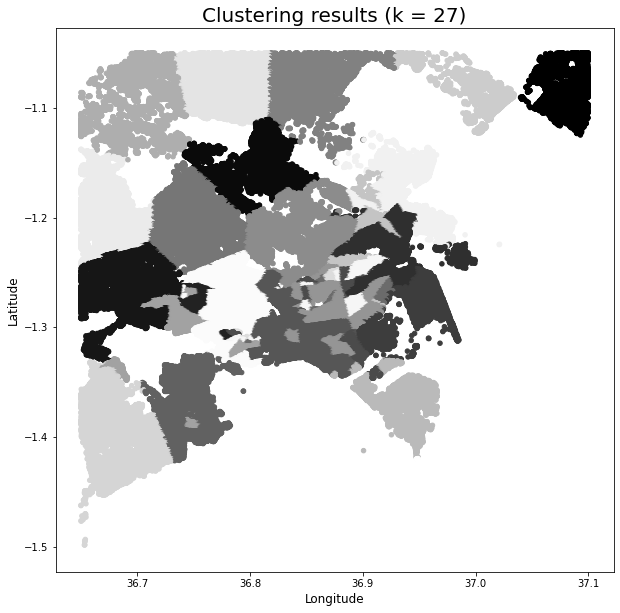

In [16]:
# Plot scatter by cluster / color, and centroids
ax = pop.plot(    
    kind="scatter", 
    x='Lon', y='Lat',
    figsize=(10,10),
    c = km.labels_.astype(float)
)

plt.title('Clustering results (k = 27)', fontsize=20)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12);

---
### Silhouette Score

/Users/aidandominguez/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


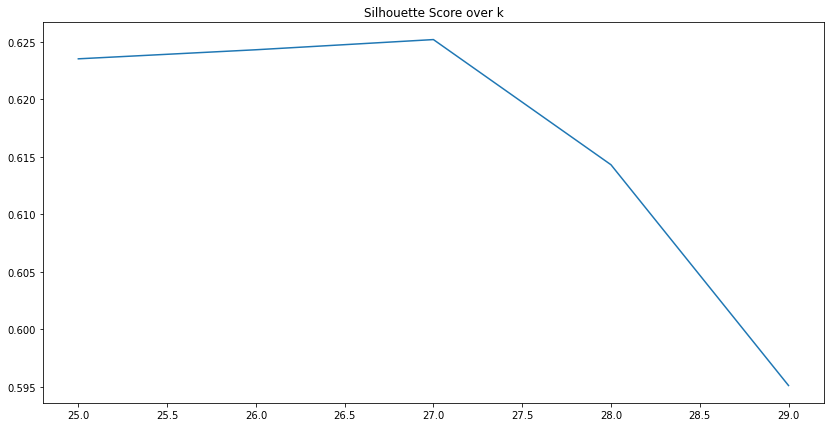

In [6]:
scores = []

pop_copy = pop.copy()
pop_copy.drop(columns='clusters', inplace = True)
X = pop[['Lat', 'Lon', 'Population']]

for k in range(25, 30):
    km = KMeans(n_clusters=k, random_state=510)
    km.fit(X)
    X['clusters'] = km.labels_
    X = X.sample(20_000, random_state=510)
    sil = silhouette_score(X.drop(columns='clusters'), X.clusters)
    scores.append([k, sil])

score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'silhouette']

best_sil(score_df)

---

### Results

In [18]:
pop.to_csv('./datasets/Nairobi_Area_Population_Clusters.csv')

In [19]:
# pickle model for use with advert data
import pickle
with open('cluster_model.pkl', 'wb') as model_out:
    pickle.dump(km_final, model_out)